<h1><center> <strong> Projet modèles linéaires avancés:
 &nbsp;
<br />
     &nbsp;
<br />
    Modèles linéaires mixtes généralisés <strong> </h1><center>
 &nbsp;
&nbsp;
&nbsp;
&nbsp;
<br />
<br />
<br />
<br />
<h2><center>AMAHJOUR Walid</center></h2>
<h3><center>Novembre 2020</center></h3>
&nbsp;
&nbsp;
&nbsp;
&nbsp;
<br />
<br />
<br />
<br />
&nbsp;
&nbsp;
&nbsp;
&nbsp;
<br />
<br />
<br />
<br />

In [42]:
import pandas as pd
import seaborn as sb
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from pandas.plotting import scatter_matrix
import scipy.stats as stats
from math import *
from statsmodels.genmod.bayes_mixed_glm import PoissonBayesMixedGLM, BinomialBayesMixedGLM 
from sklearn.linear_model import LinearRegression

# Table des matières


&nbsp;
&nbsp;
&nbsp;
<br />
<br />
<br />
## 1. Introduction

&nbsp;
&nbsp;
<br />
<br />

## 2. Moindres carrés ordinaires

&nbsp;
&nbsp;
<br />
<br />

## 3. Modèle linéaire généralisé

&nbsp;
&nbsp;
<br />
<br />

## 4. Modèles linéaires mixtes généralisés


&nbsp;
&nbsp;
<br />
<br />





## 1. Introduction

Les modèles mixtes linéaires on une importante limitation, ils ne peuvent pas accepter des variables de réponse qui n'ont pas une distribution d'erreur normale. La plupart des données biologiques ne suivent pas l'hypothèse de normalité.<br/>
Nous allons voir comment on peut appliquer les modèles linéaires généralisés, qui sont des outils importants pour surmonter les hypothèses de distribution des modèles linéaires. Nous allons voire les principaaux  distributions utilisées en fonction de la nature des variables de réponse, du concept de la fonction de lien et comment vérifier les hypothèses de ces modèles.<br/>
Nous allons utiliser plusieurs jeu de données biologique tel que mites, CO2, faramea.

## 2. Moindres carrés ordinaires

L'ensemble de données comprend 70 échantillons de mousses et d'acariens recueillis à la Station de biologie des Laurentides de l'Université de Montréal, Saint-Hippolyte, QC. Chaque échantillon comprend des mesures pour 5 variables environnementales et des données d'abondance pour 35 taxons d'acariens. Dans l'ensemble de données réduit que nous utiliserons tout au long de cet atelier, nous n'avons inclus que les 5 mesures environnementales et l'abondance d'un seul taxon d'acariens, «Galumna sp.» Notre objectif sera de modéliser l'abondance, l'occurrence (présence / absence) et la proportion de Galumna en fonction des 5 variables environnementales: par conséquent, nous avons également créé une variable présence / absence et une variable de proportion pour Galumna.

In [3]:
var=["Galumna","pa","totalabund","prop","SubsDens","WatrCont","Substrate","Shrub","Topo"]
mites=pd.read_csv("mites.csv",sep=",",header=0,names=var)
mites

,Galumna,pa,totalabund,prop,SubsDens,WatrCont,Substrate,Shrub,Topo
0,8,1,140,0.057143,39.18,350.15,Sphagn1,Few,Hummock
1,3,1,268,0.011194,54.99,434.81,Litter,Few,Hummock
2,1,1,186,0.005376,46.07,371.72,Interface,Few,Hummock
3,1,1,286,0.003497,48.19,360.50,Sphagn1,Few,Hummock
4,2,1,199,0.010050,23.55,204.13,Sphagn1,Few,Hummock
...,...,...,...,...,...,...,...,...,...
65,0,0,116,0.000000,31.46,514.85,Sphagn1,None,Blanket
66,0,0,781,0.000000,52.12,826.96,Sphagn1,None,Blanket
67,0,0,111,0.000000,29.24,590.11,Sphagn1,None,Blanket
68,0,0,184,0.000000,29.33,479.23,Sphagn1,Many,Hummock


In [4]:
mites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Galumna     70 non-null     int64  
 1   pa          70 non-null     int64  
 2   totalabund  70 non-null     int64  
 3   prop        70 non-null     float64
 4   SubsDens    70 non-null     float64
 5   WatrCont    70 non-null     float64
 6   Substrate   70 non-null     object 
 7   Shrub       70 non-null     object 
 8   Topo        70 non-null     object 
dtypes: float64(3), int64(3), object(3)
memory usage: 5.0+ KB


Pour voirsi il'y a des relations entre Galumna et les cinq variables environnementales, nous allons construire le plot suivant.

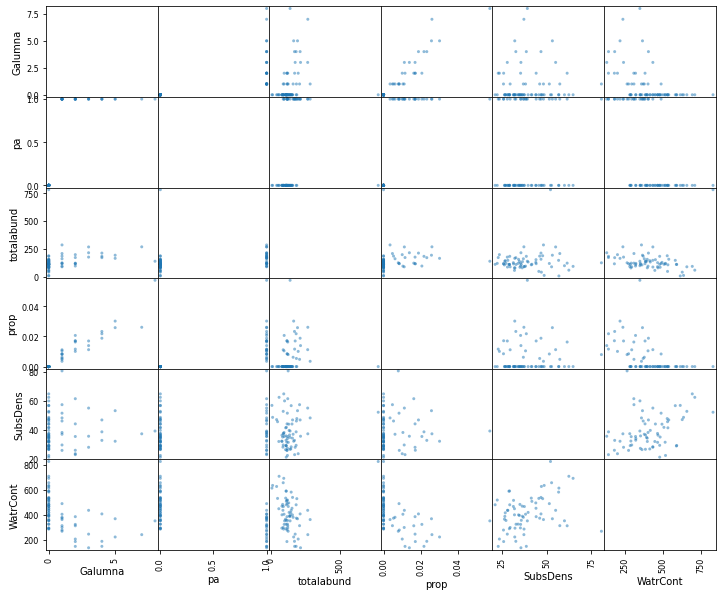

In [5]:
scatter_matrix(mites, figsize=(12, 10), diagonal=var)
plt.show()

Nous constatons qu'il y aune relation negative entre la variable WatrCont et Galumna.Pour s'assuer nous allons construires les graphes suivants 

In [6]:
WatrCont_presence=mites.WatrCont.loc[mites.pa==1]
WatrCont_absence=mites.WatrCont.loc[mites.pa==0]
d = {'absence':WatrCont_absence,'presence':WatrCont_presence}
df = pd.DataFrame(data=d)

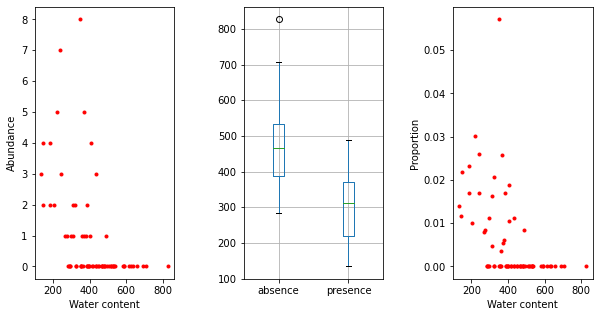

In [7]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1,3, wspace=0.5)
plt.figure(figsize=(10,5))
ax = plt.subplot(gs[0, 0])
plt.scatter(mites.WatrCont,mites.Galumna, c = 'red', marker = '.')
plt.ylabel('Abundance')
plt.xlabel('Water content')
ax = plt.subplot(gs[0, 1])
df.boxplot()
ax = plt.subplot(gs[0, 2])
plt.scatter(mites.WatrCont,mites.prop, c = 'red', marker = '.')
plt.ylabel('Proportion')
plt.xlabel('Water content')
plt.show()

Nous allons faire des modèles linéaires afin de verifier les relation entre Galumna et WatrCont, Galumna et pa, Galumna et prop. 

In [10]:
lm_abund=smf.ols('Galumna ~ WatrCont', data = mites).fit()
lm_abund.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Galumna   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     22.31
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           1.21e-05
Time:                        13:05:03   Log-Likelihood:                -127.32
No. Observations:                  70   AIC:                             258.6
Df Residuals:                      68   BIC:                             263.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4393      0.556      6.188      0.000       2.330       4.548
WatrCont      -0.0060      0.001     -4.723      0.000      -0.009      -0.003
==============================================================================
Omnibus:                       48.057   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.946
Skew:                           2.184   Prob(JB):                     8.31e-35
Kurtosis:                       8.894   Cond. No.                     1.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

modèle linéaire simple

$y = \beta_0 + \beta_1x_i + \varepsilon$

\
$y_i$ =
valeur prédite d'une variable de réponse

\\

$\beta_0$ = intercèpte 

\\

$\beta_1$ = pente

\\

$x_i$ = variables explicative 

\\

$\varepsilon_i$= modèle risiduel d'une distribution normale 


In [11]:
lm_pa=smf.ols('pa ~ WatrCont', data = mites).fit()
lm_pa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pa   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     37.80
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           4.68e-08
Time:                        13:05:03   Log-Likelihood:                -32.354
No. Observations:                  70   AIC:                             68.71
Df Residuals:                      68   BIC:                             73.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1892      0.143      8.309      0.000       0.904       1.475
WatrCont      -0.0020      0.000     -6.148      0.000      -0.003      -0.001
==============================================================================
Omnibus:                       13.423   Durbin-Watson:                   1.312
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.093
Skew:                           0.225   Prob(JB):                        0.129
Kurtosis:                       1.904   Cond. No.                     1.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
lm_prop=smf.ols('prop ~ WatrCont', data = mites).fit()
lm_prop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prop   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     21.49
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           1.67e-05
Time:                        13:05:03   Log-Likelihood:                 231.65
No. Observations:                  70   AIC:                            -459.3
Df Residuals:                      68   BIC:                            -454.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0202      0.003      6.133      0.000       0.014       0.027
WatrCont   -3.516e-05   7.59e-06     -4.635      0.000   -5.03e-05      -2e-05
==============================================================================
Omnibus:                       66.332   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              488.334
Skew:                           2.732   Prob(JB):                    9.11e-107
Kurtosis:                      14.729   Cond. No.                     1.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretation des résultats des regressions: Mème si on a obtenue des résultats de regressions singnificatives on peut pas s'arreter ici, on doit donc verifier l'hypothèse de la normalité des risidus. 


On s'interesse à la relation entre Galumna et WatrCont.Pour voir mieux la qualité de la régression on utulise souvent ces graphes.

In [47]:
lm_abund.params[0]

3.439348671737164

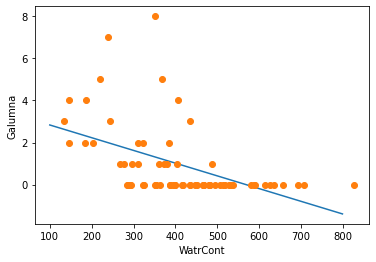

In [14]:
x = np.array(range(100,800))
y = lm_abund.params[1]*x+lm_abund.params[0]
plt.plot(x,y)
plt.ylabel('Galumna')
plt.xlabel('WatrCont')
plt.plot(mites.WatrCont,mites.Galumna,'o')
plt.show()

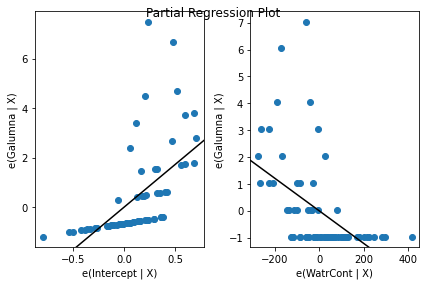

In [15]:
fig = sm.graphics.plot_partregress_grid(lm_abund)
fig.tight_layout(pad=1.0)


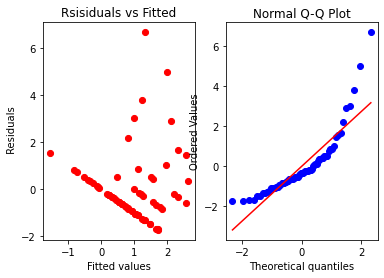

In [16]:
plt.subplot(121)
x1=np.array(lm_abund.fittedvalues)
y1=np.array(lm_abund.resid)
plt.scatter(x1, y1,s = 150, c = 'red', marker = '.')
plt.title('Rsisiduals vs Fitted')
plt.ylabel(' Residuals')
plt.xlabel('Fitted values')
plt.subplot(122)
residuals = np.array(lm_abund.resid)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

plt.show()

Interpretation des graphes: il est claire que l'hypothèse de la normalité des risidus est moins probable, comme le montres les deux histogrammes suivants.

sigma 

In [56]:
sigma_err = np.sqrt(lm_abund.scale)
sigma_err
print('sigma= 1.51353094952848')

sigma= 1.51353094952848


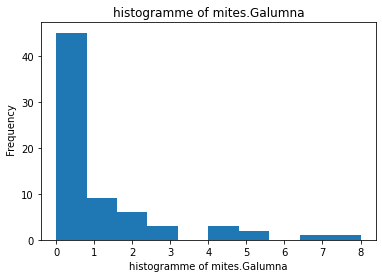

In [18]:
plt.hist(mites.Galumna)
plt.title('histogramme of mites.Galumna')
plt.ylabel(' Frequency')
plt.xlabel('histogramme of mites.Galumna')
plt.show()

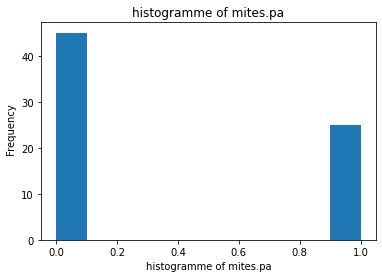

In [19]:
plt.hist(mites.pa)
plt.title('histogramme of mites.pa')
plt.ylabel(' Frequency')
plt.xlabel('histogramme of mites.pa')
plt.show()

$y_i \sim N(\mu = \beta_0 + \beta_1 X_i, \sigma^2)$ donc cette hypothese n'est pas vraie.
Nous avons besoin d'une distribution avec une plage qui n'inclut que deux résultats possibles: zéro ou un. La distribution «Bernoulli» est une telle distribution.

## 3. Modèle linéaire généralisé

Pour contourner le probleme de la normalité des $y_i$  on peut supposer que les $ε_i$  suivent une loie de Poisson. <br />
$y_i \sim Poisson(\lambda = \beta_0 + \beta_1 x_i)$

Avantages:
<ul>
<li>
Les valeurs prédites seront désormais des entiers au lieu de fractions</li>
<li>Le modèle ne prédira jamais de valeurs négatives (Poisson est strictement positif)</li>
<li>
$\lambda$
 varie avec
$x$
 (teneur en eau), ce qui signifie que la variance résiduelle variera également avec
$x$
. Cela signifie également que nous avons assoupli l'hypothèse d'homogénéité de la variance</li>
</ul>


In [91]:
Topo=mites.Topo
Topo.loc[Topo=='Blanket']=0
Topo.loc[Topo=='Hummock']=1
Topo
d = {'mites.WatrCont': mites.WatrCont, 'Topo': Topo}
df = pd.DataFrame(data=d)
df
poisson_reg =sm.GLM(mites.pa,sm.add_constant(df.astype(float)), data = mites, family =sm.families.Poisson()).fit()
poisson_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     pa   No. Observations:                   70
Model:                            GLM   Df Residuals:                       67
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39.873
Date:                Sun, 08 Nov 2020   Deviance:                       29.747
Time:                        20:11:28   Pearson chi2:                     31.3
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3596      0.766      0.469      0.639      -1.142       1.861
mites.WatrCont    -0.0054      0.002     -2.937      0.003      -0.009      -0.002
Topo               0.8957      0.476      1.880      0.060      -0.038       1.830
==================================================================================
"""

### variables binaires

Une variable de réponse commune dans les ensembles de données écologiques est la variable binaire: nous observons un phénomène
$x$ ou son «absence».

<ul>
<li>
présence ou absence d'une éspece</li>
<li>présence ou absence d'une maladie</li>
<li>
succés ou échec d'une experimentation</li>
</ul>

In [93]:
Topo=mites.Topo
Topo.loc[Topo=='Blanket']=0
Topo.loc[Topo=='Hummock']=1
Topo
d = {'mites.WatrCont': mites.WatrCont, 'Topo': Topo}
df = pd.DataFrame(data=d)
df
#sm.add_constant(X) to add the intercept
model_glm=sm.GLM(mites.pa,sm.add_constant(df).astype(float), data = mites, family =sm.families.Binomial()).fit()
model_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     pa   No. Observations:                   70
Model:                            GLM   Df Residuals:                       67
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24.381
Date:                Sun, 08 Nov 2020   Deviance:                       48.762
Time:                        20:17:27   Pearson chi2:                     48.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4644      1.671      2.672      0.008       1.190       7.739
mites.WatrCont    -0.0158      0.005     -3.487      0.000      -0.025      -0.007
Topo               2.0908      0.735      2.843      0.004       0.650       3.532
==================================================================================
"""

### regression logit 


$g(p) = log\frac{p}{1-p}$

In [23]:
#sm.add_constant(df) to add the intercept
logit_reg =sm.GLM(mites.pa,sm.add_constant(df.astype(float)), data = mites, family =sm.families.Binomial(link=sm.families.links.logit)).fit()
logit_reg .summary()

<ipython-input-23-525fe09a8438>:2: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  logit_reg =sm.GLM(mites.pa,sm.add_constant(df.astype(float)), data = mites, family =sm.families.Binomial(link=sm.families.links.logit)).fit()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     pa   No. Observations:                   70
Model:                            GLM   Df Residuals:                       67
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24.381
Date:                Sun, 08 Nov 2020   Deviance:                       48.762
Time:                        13:05:05   Pearson chi2:                     48.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4644      1.671      2.672      0.008       1.190       7.739
mites.WatrCont    -0.0158      0.005     -3.487      0.000      -0.025      -0.007
Topo               2.0908      0.735      2.843      0.004       0.650       3.532
==================================================================================
"""

In [24]:
logit_reg.params
exp_logit_reg_coefficients=[exp(logit_reg.params[1]),exp(logit_reg.params[2])]#/ (1 - logit_reg.params[0]),logit_reg.params[1]/ (1 - logit_reg.params[1])]
print('exp(log(μ / (1 - μ)) = u / (1 - μ)')
print(exp_logit_reg_coefficients)
con_int_logit=pd.DataFrame(logit_reg.conf_int(0.25))
print('intervale de confiance')
#print(con_int_logit)
params = logit_reg.params
conf = logit_reg.conf_int(0.025)
conf.columns = ['2.5%', '97.5%']
print(np.exp(conf))
#OR=np.exp(logit_reg.params)
#print(OR)
#params = logit_reg.params
#conf = logit_reg.conf_int(0.025)
#conf.columns = ['2.5%', '97.5%']
#print(np.exp(conf))

exp(log(μ / (1 - μ)) = u / (1 - μ)
[0.9843118083493371, 8.091034000774105]
intervale de confiance
                    2.5%        97.5%
const           2.054154  3673.645516
mites.WatrCont  0.974357     0.994368
Topo            1.556664    42.054571


In [25]:
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

# GLMs with count data

In [26]:
names=['Unnamed: 0','UTM.EW','UTM.NS','Precipitation','Elevation','Age','Age.cat','Geology','Faramea_occidentalis']
faramea=pd.read_csv("faramea.csv",sep=",",header=0,names=names)
faramea.head(6)


,Unnamed: 0,UTM.EW,UTM.NS,Precipitation,Elevation,Age,Age.cat,Geology,Faramea_occidentalis
0,B0,625754.0,1011569.0,2530.0,120,3,c3,Tb,14
1,B49,626654.0,1011969.0,2530.0,120,3,c3,Tb,7
2,p1,614856.9,1031786.4,2993.2,20,2,c2,Tc,0
3,p2,613985.4,1030725.4,3072.0,100,3,c3,Tc,0
4,p3,614674.3,1023801.5,3007.4,180,1,c1,Tc,2
5,p4,615018.6,1023547.9,2999.8,180,1,c1,Tc,1


plots

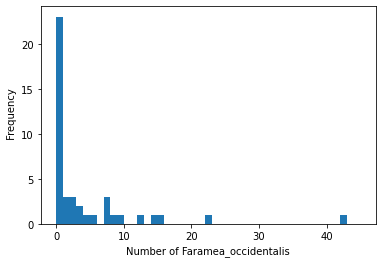

In [27]:
bins=np.arange(0, 46, step = 1)
plt.hist(faramea.Faramea_occidentalis, bins=bins)
plt.ylabel(' Frequency')
plt.xlabel('Number of Faramea_occidentalis')
plt.show()

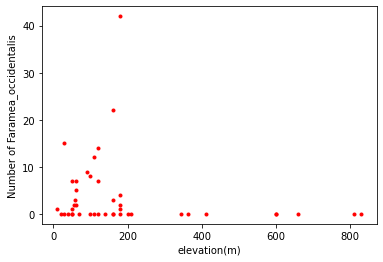

In [57]:
plt.scatter(faramea.Elevation,faramea.Faramea_occidentalis, c = 'red', marker = '.')
plt.ylabel('Number of Faramea_occidentalis')
plt.xlabel('elevation(m)')
plt.show()

# Poisson GLM

In [58]:
poisson_reg =sm.GLM(faramea.Faramea_occidentalis,sm.add_constant(faramea.Elevation.astype(float)), data = faramea, family =sm.families.Poisson()).fit()
poisson_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:     Faramea_occidentalis   No. Observations:                   43
Model:                              GLM   Df Residuals:                       41
Model Family:                   Poisson   Df Model:                            1
Link Function:                      log   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -229.00
Date:                  Sun, 08 Nov 2020   Deviance:                       388.12
Time:                          19:45:35   Pearson chi2:                     655.
No. Iterations:                       5                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7687      0.110     16.092      0.000       1.553       1.984
Elevation     -0.0027      0.001     -4.253      0.000      -0.004      -0.001
==============================================================================
"""

# Negative binomial GLMs

In [30]:
nbinomial_reg =sm.GLM(faramea.Faramea_occidentalis,sm.add_constant(faramea.Elevation.astype(float)), data = faramea, family =sm.families.NegativeBinomial()).fit()
nbinomial_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:     Faramea_occidentalis   No. Observations:                   43
Model:                              GLM   Df Residuals:                       41
Model Family:          NegativeBinomial   Df Model:                            1
Link Function:                      log   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -100.37
Date:                  Sun, 08 Nov 2020   Deviance:                       91.089
Time:                          13:05:08   Pearson chi2:                     154.
No. Iterations:                      12                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1108      0.259      8.144      0.000       1.603       2.619
Elevation     -0.0052      0.001     -3.642      0.000      -0.008      -0.002
==============================================================================
"""

# Generalized linear mixed models

In [35]:
noms=['Unnamed: 0','reg','popu','gen','rack','nutrient','amd','status','total_fruits']
dat_tf=pd.read_csv("Banta_TotalFruits.csv",sep=",",header=0,names=noms)
dat_tf

,Unnamed: 0,reg,popu,gen,rack,nutrient,amd,status,total_fruits
0,1,NL,3.NL,4,2,1,clipped,Transplant,0
1,2,NL,3.NL,4,1,1,clipped,Petri.Plate,0
2,3,NL,3.NL,4,1,1,clipped,Normal,0
3,4,NL,3.NL,4,2,1,clipped,Normal,0
4,5,NL,3.NL,4,2,8,clipped,Transplant,0
...,...,...,...,...,...,...,...,...,...
620,828,SW,1.SW,25,2,8,unclipped,Normal,5
621,831,SW,1.SW,25,1,1,clipped,Transplant,3
622,853,SW,1.SW,27,2,8,unclipped,Normal,5
623,854,SW,1.SW,27,2,8,clipped,Transplant,5


In [94]:
#poisson_glm=BinomialBayesMixedGLM.from_formula(dat_tf.total_fruits,dat_tf.nutrient*dat_tf.amd + dat_tf.rack + dat_tf.status +(1-dat_tf.popu)+(1-dat_tf.gen)).fit()
